<h4>Imports</h4>
<p>You start by importing the neccessary Python libraries to create and run your deep-learning classification model.</p>

In [1]:
#Data Handling and Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

#Statistical Analysis
from scipy import stats

#Plotting and Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120
import gmaps
!jupyter nbextension enable --py gmaps

#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok
Using TensorFlow backend.
c:\users\dcraciun\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dcraciun\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dcraciun\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will b

<h4>Load Data:</h4>
<p>You load the copies of the Customer Loans and Demographics datasets, that you downloaded from Azure Data Share.</p>

In [2]:
df_loans = pd.read_csv('Data/customer_loans.csv',sep=',')
df_loans.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved


In [3]:
df_customer = pd.read_csv('Data/customer_demographics.csv',sep=',')
df_customer.head()

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt
0,92886957,Barbara Thompson,Automotive Service Technicians and Mechanics,39,31.84568,-102.36764,43415,658,4,79761,Odessa,TX,94700,44174,23878.25
1,16462625,James Wade,Prosthodontists,93,42.73920,-84.62081,564164,786,4,48917,Lansing,MI,138000,51830,5641.64
2,89457436,Joel Jackson,Surgeons,99,44.27804,-88.27205,466344,676,1,54140,Little Chute,WI,139200,58247,233172.00
3,68462543,Tyler Clements,Physicians and Surgeons,100,33.50921,-111.89903,756171,694,2,85250,Scottsdale,AZ,250200,59358,378085.50
4,63315493,Adam Stephens,"Railroad Brake, Signal, and Switch Operators",97,33.93113,-117.54866,58948,688,2,92860,Norco,CA,385100,84905,30063.48


<h4>Examine Missing Data</h4>
<p>You check that there no null values in each dataset columns.</p>

In [4]:
df_loans.isna().sum()

custid             0
Income             0
CreditScore        0
Debt               0
Date               0
LoanTerm           0
InterestRate       0
CreditIncidents    0
HomeValue          0
LoanAmount         0
ProductType        0
LoanStatus         0
dtype: int64

In [5]:
df_customer.isna().sum()

custid                   0
Name                     0
Job                      0
Age                      0
Lat                      0
Long                     0
Income                   0
CreditScore              0
HouseholdSize            0
ZipCode                  0
MajorCity                0
State                    0
MedianHomeValue          0
MedianHouseholdIncome    0
Debt                     0
dtype: int64

<h4>Examine Outliers:</h4>
<p>Check if there are any outliers beyond 3 standard deviations on the numerical columns of the datasets. </p>

In [6]:
num_cols_customer = ['Age','Income','CreditScore','HouseholdSize','MedianHomeValue','Debt']
df_customer[(np.abs(stats.zscore(df_customer[num_cols_customer])) > 3).all(axis=1)]

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt


In [7]:
num_cols_loans = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount']
df_loans[(np.abs(stats.zscore(df_loans[num_cols_loans])) > 3).all(axis=1)]

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus


<h4>Descriptive Statistics:</h4>
<p> Analyze the data from each dataset from a statistical point of view. Create histograms for your datasets.</p>


In [8]:
df_customer[num_cols_customer].describe()

,Age,Income,CreditScore,HouseholdSize,MedianHomeValue,Debt
count,48427.000000,48427.000000,48427.000000,48427.000000,4.842700e+04,48427.000000
mean,58.968509,182892.674665,700.479505,2.935408,2.324090e+05,36802.268387
std,23.886030,256729.653035,64.881945,1.876389,1.566480e+05,60675.888778
min,18.000000,10000.000000,620.000000,1.000000,4.860000e+04,0.000000
25%,38.000000,29018.500000,645.000000,2.000000,1.273000e+05,12851.560000
50%,59.000000,48407.000000,667.000000,3.000000,1.901000e+05,22052.250000
75%,80.000000,231794.000000,780.000000,4.000000,2.831000e+05,34402.530000
max,100.000000,949942.000000,799.000000,10.000000,1.000001e+06,924099.820000


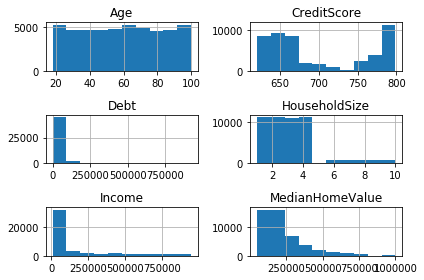

In [9]:
df_customer[num_cols_customer].hist()
plt.tight_layout()

In [10]:
df_loans[num_cols_loans].describe()

,Income,CreditScore,Debt,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount
count,48427.000000,48427.000000,48427.000000,48427.000000,48427.000000,48427.000000,4.842700e+04,4.842700e+04
mean,182892.674665,700.479505,36802.268387,359.902121,0.039988,2.578128,5.289217e+05,2.634072e+05
std,256729.653035,64.881945,60675.888778,112.512956,0.002915,1.844025,3.765134e+05,2.409933e+05
min,10000.000000,620.000000,0.000000,180.000000,0.035000,0.000000,7.290000e+04,8.262000e+03
25%,29018.500000,645.000000,12851.560000,180.000000,0.037000,1.000000,2.776800e+05,1.063520e+05
50%,48407.000000,667.000000,22052.250000,420.000000,0.040000,2.000000,4.161500e+05,1.933200e+05
75%,231794.000000,780.000000,34402.530000,480.000000,0.043000,4.000000,6.460800e+05,3.346500e+05
max,949942.000000,799.000000,924099.820000,480.000000,0.045000,6.000000,3.000003e+06,2.700003e+06


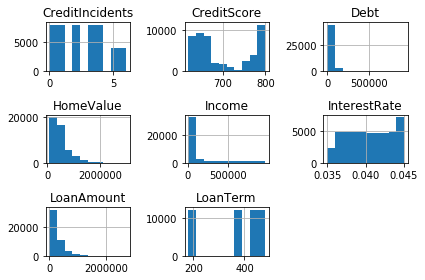

In [11]:
df_loans[num_cols_loans].hist()
plt.tight_layout()

<h4>Customer Location Heatmap:</h4>
<p>Use the Google Maps <b>gmaps</b> library to display the density of customers.</p>

In [12]:
latitudes = df_customer["Lat"]
longitudes = df_customer["Long"]

locations = np.array(list(zip(latitudes,longitudes)))
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

<h4>Join Datasets Together:</h4>

In [13]:
cols_to_use = df_customer.columns.difference(df_loans.columns).tolist()
cols_to_use.append('custid')
df = df_loans.merge(df_customer[cols_to_use], on = 'custid')
df.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus,Age,HouseholdSize,Job,Lat,Long,MajorCity,MedianHomeValue,MedianHouseholdIncome,Name,State,ZipCode
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved,39,4,Automotive Service Technicians and Mechanics,31.84568,-102.36764,Odessa,94700,44174,Barbara Thompson,TX,79761
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved,93,4,Prosthodontists,42.73920,-84.62081,Lansing,138000,51830,James Wade,MI,48917
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved,99,1,Surgeons,44.27804,-88.27205,Little Chute,139200,58247,Joel Jackson,WI,54140
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved,100,2,Physicians and Surgeons,33.50921,-111.89903,Scottsdale,250200,59358,Tyler Clements,AZ,85250
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved,97,2,"Railroad Brake, Signal, and Switch Operators",33.93113,-117.54866,Norco,385100,84905,Adam Stephens,CA,92860


<h4>Create Features:</h4>

In [14]:
num_features = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount',
               'HouseholdSize','Lat','Long','MedianHomeValue','MedianHouseholdIncome']
df_features = df[num_features]
df_product_type = pd.get_dummies(df.ProductType,prefix='ProductType')
df_features = pd.concat([df_features,df_product_type],axis=1)
features = df_features.values
targets = np.argmax(pd.get_dummies(df.LoanStatus).values,axis=1)

<h4>Scale Data:</h4>

In [15]:
scaler=MinMaxScaler()
X = scaler.fit_transform(features)

<h4>Neural Network Model Creation:</h4>
<p>Build the neural network model using the deep-learning functions below.</p>

In [16]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [17]:
def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    history = model.fit(data_train,labels_train,validation_data=(data_test,labels_test),epochs=30,batch_size=128)
    val_acc = history.history['val_accuracy'][-1]
    return val_acc, history

<h4>K-Fold Cross Validation:</h4>
<p>Check that the model is accurate to be used for the predictions. The closer the acuuracy is to 1, the better is the model.</p>

In [ ]:
scores = []
models = []
historys = []
num_splits = 3
kf = KFold(n_splits=num_splits)
kf.get_n_splits(X)
input_shape = X.shape[1]

fold = 0
for train_index, test_index in kf.split(X):
    print("Running fold {}".format(fold))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    model = create_model(input_shape)
    score, history = train_and_evaluate__model(model,X_train,y_train,X_test,y_test)
    scores.append(score)
    models.append(model)
    historys.append(history)
    fold += 1
    
print('\n\nEstimated Accuracy ' , (np.round(np.mean(scores),2)), '  %')

Running fold 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 32450 samples, validate on 16225 samples
Epoch 1/30
32450/32450 [==============================] - 1s 34us/step - loss: 0.5727 - accuracy: 0.7699 - val_loss: 0.5231 - val_accuracy: 0.7790
Epoch 2/30
32450/32450 [==============================] - 1s 20us/step - loss: 0.5151 - accuracy: 0.7758 - val_loss: 0.4951 - val_accuracy: 0.7790
Epoch 3/30
32450/32450 [==============================] - 1s 23us/step - loss: 0.4833 - accuracy: 0.7758 - val_loss: 0.4507 - val_accuracy: 0.7790
Epoch 4/30
32450/32450 [==============================] - 1s 21us/step - loss: 0.4298 - accuracy: 0.7758 - val_loss: 0.3847 - val_accuracy: 0.7790
Epoch 5/30
32450/32450 [==============================] - 1s 27us/step - loss: 0.3729 - accuracy: 0.8190 - val_loss: 0.3300 - val_accuracy: 0.8790
Epoch 6/30
32450/32450 [==============================] - 1s 19us/step - loss: 0

<h4>Model Creation After K-Fold Cross Validation:</h4>
<p>If the accuracy is high, retrain your model including more data in the train and test set.</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.20, random_state=42)
model = create_model(input_shape)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=30,batch_size=128)

<h4>Model Performance:</h4>
<p>You can see your model performance based on its loss and accuracy. A loss closer to zero and an accuracy closer to 1 indicate a performant deep-learning model.</p>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();